In [10]:
"""
        SETUP ENVIRONMENT
"""
from enviroment import *
import gymnasium as gym
"""
Some environments to try
'CartPole-v1'
'Maze-sample-5x5-v0'
'MountainCar-v0'
'FrozenLake-v1': 'FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False
FrozenLake8x8-v1: 'FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False
"""
env = gym.make('Pendulum-v1', g=0.0)
# Define a custom reward dictionary

obs , _= env.reset()
try:
    obs_dim = len(obs)
except BaseException:
    obs_dim = 1
try:
    print(env.action_space)
    action_dim = env.action_space.n
except BaseException:
    print(env.action_space[0])
print("State dim:", obs_dim)
print("Action dim:", action_dim)

"""
    Maze environment custom
"""
from maze_env import CustomMazeEnv
maze_env = CustomMazeEnv()
state = maze_env.reset()
maze_env.render()
maze_obs_dim = 2
maze_action_dim = maze_env.action_space.n
print("Maze State dim:", obs_dim)
print("Maze Action dim:", action_dim)

Box(-2.0, 2.0, (1,), float32)


TypeError: 'Box' object is not subscriptable

In [2]:
"""
        SETUP AGENT
"""
# REINFORCE
BETA1 = 0.1
BETA2 = 0.9
LEARNING_RATE = 0.001
from mtrshka import ReinforceAgent
agent1 = ReinforceAgent(obs_dim,env.action_space.n, hidden_dim=32,horizon= 500, learning_rate= LEARNING_RATE)
agent1.policy.ntk_init(beta=BETA1)
agent2 = ReinforceAgent(obs_dim,env.action_space.n, hidden_dim=32,horizon= 500, learning_rate= LEARNING_RATE )
agent2.policy.ntk_init(beta=BETA2)
#ACTOR-CRITIC
from actor_critic import Actor, Critic
actor = Actor(obs_dim, env.action_space.n)
critic = Critic(obs_dim)

beta1 = 0.1    beta2 = 0.9
Episode 1
Reward: 25.4  and  10.6
Episode 2
Reward: 24.0  and  10.8


C:\Users\koq1231\PycharmProjects\RL\mtrshka.py:140: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  states_tensor = torch.FloatTensor(states)


Episode 3
Reward: 28.6  and  10.7
Episode 4
Reward: 21.4  and  10.4
Episode 5
Reward: 30.8  and  10.6
Episode 6
Reward: 31.6  and  12.9
Episode 7
Reward: 30.7  and  10.9
Episode 8
Reward: 33.6  and  11.4
Episode 9
Reward: 32.1  and  14.0
Episode 10
Reward: 37.2  and  12.5
Episode 11
Reward: 34.0  and  11.5
Episode 12
Reward: 50.4  and  12.0
Episode 13
Reward: 51.5  and  11.2
Episode 14
Reward: 45.8  and  12.4
Episode 15
Reward: 58.7  and  13.6
Episode 16
Reward: 54.0  and  13.1
Episode 17
Reward: 64.8  and  12.6
Episode 18
Reward: 78.8  and  14.4
Episode 19
Reward: 84.7  and  13.7
Episode 20
Reward: 90.5  and  11.2
Episode 21
Reward: 75.9  and  12.4
Episode 22
Reward: 100.1  and  13.1
Episode 23
Reward: 94.8  and  14.3
Episode 24
Reward: 142.9  and  17.8
Episode 25
Reward: 131.4  and  13.7
Episode 26
Reward: 199.6  and  13.8
Episode 27
Reward: 135.8  and  14.9
Episode 28
Reward: 141.4  and  16.9
Episode 29
Reward: 164.5  and  16.9
Episode 30
Reward: 222.7  and  18.8
Episode 31
Reward: 

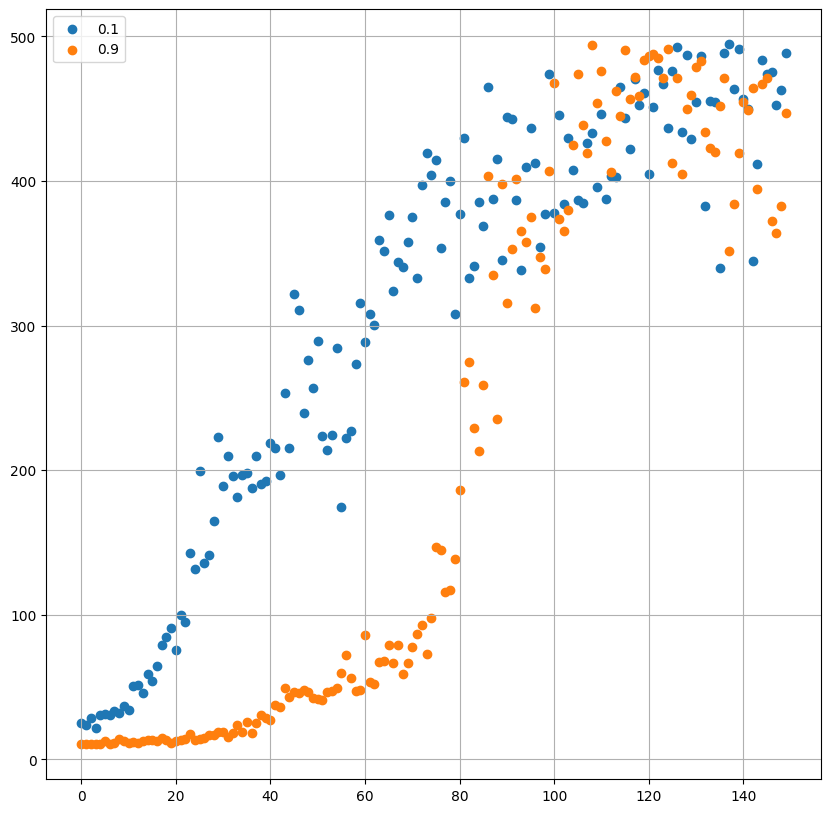

In [3]:
"""
        TRAINING (REINFORCE)
"""
import torch
from utils import run_episodes
import matplotlib.pyplot as plt
NUM_EPOCHES = 150
N_EPISODES = 10 # ^number of episodes per epoch
"""-------------------------------------------------------------------"""
obs_dim = agent1.ObsSpaceDim
initialize_env(env, obs_dim = obs_dim)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
loss_list = []
loss_ntk_list = []
# Train for a number of epochs
print(f"beta1 = {BETA1}    beta2 = {BETA2}")
for epoch in range(NUM_EPOCHES ):
    episodes = run_episodes(agent1, env, n_episodes=N_EPISODES,  game= "NON")  # Collect episodes
    episodes_ntk = run_episodes(agent2, env, n_episodes=N_EPISODES,  game= "NON")  # Collect episodes

    loss = agent1.train( episodes)  # Update the policy based on the episodes
    loss_ntk = agent2.train(episodes_ntk)  # Update the policy based on the episodes
    loss_list.append(loss)
    loss_ntk_list.append(loss_ntk)
    print(f"Episode {epoch + 1}")
    print(f'Reward: {loss}  and  {loss_ntk}')
    env_reset(env)
close_env(env)
ax1.scatter(range(len(loss_list)),loss_list, label=f"{BETA1}")
ax1.scatter(range(len(loss_ntk_list)),loss_ntk_list, label=f"{BETA2}")
ax1.grid()
ax1.legend()


In [4]:
""" TEST AGENT"""
"-------------------TEST-------------------"
env = gym.make('CartPole-v1', render_mode = "human")
run_episodes(agent1, env, n_episodes=10)
env.reset()
run_episodes(agent2, env, n_episodes=10)
close_env(env)

State dim: 4
Action dim: 2
beta1 = 0.5 
Episode 1
Reward: 20.2 
Episode 11
Reward: 39.7 
Episode 21
Reward: 35.8 
Episode 31
Reward: 40.7 
Episode 41
Reward: 122.4 
Episode 51
Reward: 202.7 
Episode 61
Reward: 316.2 
Episode 71
Reward: 390.1 
Episode 81
Reward: 453.7 
Episode 91
Reward: 410.9 
Episode 101
Reward: 420.9 
Episode 111
Reward: 470.9 
Episode 121
Reward: 483.5 
Episode 131
Reward: 416.6 
Episode 141
Reward: 479.9 


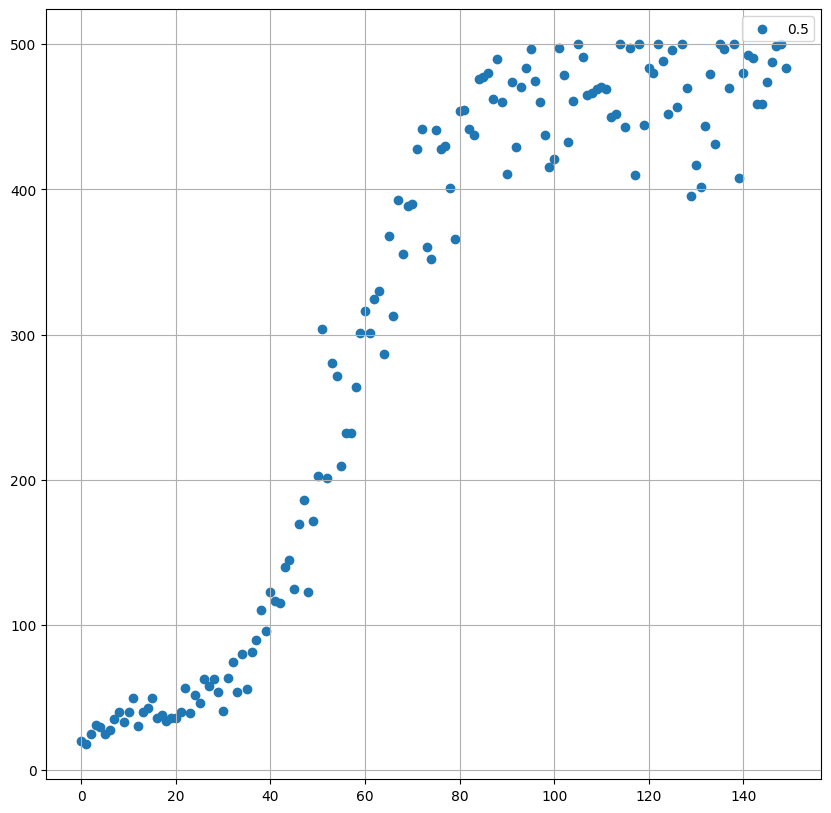

In [11]:
"""
    Matryoshka
"""
from enviroment import *
import gymnasium as gym
import torch.optim as optim
from mtrshka import MTRAgent, PolicyNet
import matplotlib.pyplot as plt
from utils import run_episodes_mtr
LEARNING_RATE = 0.001
NUM_EPOCHES = 150
N_EPISODES = 10 # ^number of episodes per epoch
BETA = 0.5
env = gym.make('CartPole-v1')
obs , _= env.reset()
try:
    obs_dim = len(obs)
except BaseException:
    obs_dim = 1
action_dim = env.action_space.n
print("State dim:", obs_dim)
print("Action dim:", action_dim)
"""-------------------------------------------------------------------"""
agent = MTRAgent(obs_dim, env.action_space.n, hidden_dim= 32, horizon= 500, learning_rate= LEARNING_RATE )
agent.policy.ntk_init(beta=BETA)
initialize_env(env, obs_dim = obs_dim)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
loss_list = []
# Train for a number of epochs
print(f"beta1 = {BETA} ")
for epoch in range(NUM_EPOCHES ):
    episodes = run_episodes_mtr(agent, env, n_episodes=N_EPISODES, game= "NON")  # Collect episodes
    loss = agent.train(episodes)  # Update the policy based on the episodes
    loss_list.append(loss)
    if epoch%10 == 0:
        print(f"Episode {epoch + 1}")
        print(f'Reward: {loss} ')
    env_reset(env)
close_env(env)
ax1.scatter(range(len(loss_list)),loss_list, label=f"{BETA}")
ax1.grid()
ax1.legend()

In [12]:
env = gym.make("CartPole-v1", render_mode = "human")
for epoch in range(10 ):
    episodes = run_episodes_mtr(agent, env, n_episodes=1, game= "NON")  # Collect episodes
    env_reset(env)
env.close()

In [ ]:
"""
        TRAINING (REINFORCE) PARALLEL
"""

LEARNING_RATE = 0.01
NUM_EPOCHES = 30
N_EPISODES = 20 # ^number of episodes per epoch
"""-------------------------------------------------------------------"""
import torch.optim as optim
from try_grad_policy import train_policy
import multiprocessing

optimizer = optim.Adam(policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer
optimizer_ntk = optim.Adam(ntk_policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer


initialize_env(env)

output_queue1 = multiprocessing.Queue()
output_queue2 = multiprocessing.Queue()
run_process1 = multiprocessing.Process(target=run_episodes, args=(policy, env,output_queue1, N_EPISODES))
run_process2 = multiprocessing.Process(target=run_episodes, args=(ntk_policy, env,output_queue2, N_EPISODES))


# Train for a number of epochs
for epoch in range(NUM_EPOCHES ):
    run_process1.start()  # Collect episodes
    run_process2.start()
    # Join the processes to wait for them to finish
    run_process1.join()
    run_process2.join()
    # Get the outputs from both processes
    episodes = output_queue1.get()
    ntk_episodes = output_queue2.get()
    loss = train_policy(policy, optimizer, episodes)  # Update the policy based on the episodes
    ntk_loss = train_policy(ntk_policy, optimizer_ntk, ntk_episodes)  # Update the ntk_policy based on the episodes
    print(f'Episode {epoch + 1}, Total Loss: {BETA1}={loss} and {BETA2}={ntk_loss} ')
close_env(env)
"-------------------TEST-------------------"
env = gym.make('CartPole-v1', render_mode = "human" )
run_episodes(policy, env, n_episodes=10)